# Algorytmy macierzowe — lab 1

### Krzysztof Kopel, Marcin Szulc

## Cel laboratorium
Celem laboratorium było zaimplementowanie i przetestowanie podstawowych algorytmów mnożenia macierzy, w tym metod Binéta, Strassena oraz Nature AI. Testowanie zaimplementowanych algorytmów polegać miało w szczególności na sprawdzeniu ich poprawności oraz oszacowaniu złożoności obliczeniowej, a także zależności czasu wykonania, zużycia pamięci i liczby operacji zmiennoprzecinkowych od rozmiaru macierzy wejściowych.

## Ustalenia techniczne
Do implementacji algorytmów wykorzystaliśmy język Python w wersji 3.13. Macierze zostały zaimplementowane jako Numpy ndarrays, które dzięki swojej implementacji są szybsze od tradycyjnych Pythonowych list wielowymiarowych, jak również posiadają kilka przydatnych dla nas metod, np. do sprawdzania rozmiaru macierzy. Każdy algorytm "opakowaliśmy" w klasę, w której zapisywaliśmy informację na temat liczby wykonanych operacji zmiennoprzecinkowych oraz zużycia pamięci (tzw. wrapper). Do pomiaru czasu wykonania posłużyła nam biblioteka time. Do wizualizacji wyników wykorzystaliśmy bibliotekę matplotlib.
#### Generowanie macierzy testowych
Wygenerowaliśmy macierze kwadratowe o rozmiarach od 1 x 1 do 1000 × 1000 (po dwie każdego rozmiaru), zawierające losowe liczby zmiennoprzecinkowe z przedziału $[0.00000001, 1]$.

In [4]:
import numpy as np

matrices = [(np.random.uniform(0.00000001, 1, (i, i)), np.random.uniform(0.00000001, 1, (i, i))) for i in range(1, 1001)]

#### Analiza poprawności
Wszystkie algorytmy przetestowaliśmy pod kątem poprawności, porównując zwracane przez nie wyniki z wynikami poprawnymi, uzyskanymi ręcznie (dla mniejszych macierzy), lub obliczonych właściwymi funkcjami biblioteki Numpy (dla większych macierzy). Przeprowadziliśmy testy dla przypadków 1 × 1, 2 × 2, 3 × 3, 10 × 10 i 100 × 100. Wszystkie testy zakończyły się sukcesem.

## Metoda Binéta
Metoda Binéta polega na podzieleniu macierzy na cztery "bloki" i wykonaniu na nich rekurencyjnie odpowiednich operacji mnożenia i dodawania. Rekurencja kończyła się, gdy liczba kolumn lub wierszy w jednej z macierzy spadała do 1, wówczas reszta mnożenia była wykonywana algorytmem klasycznym.
### Pseudokod algorytmu:
1. Jeśli któraś z macierzy ma liczbę kolumn lub wierszy równą 1, to wykonaj mnożenie klasyczne i zakończ.
2. Podziel macierz A na cztery bloki: A11, A12, A21, A22.
3. Podziel macierz B na cztery bloki: B11, B12, B21, B22.
4. Oblicz następujące iloczyny rekurencyjnie (wracając do punktu 1 tego algorytmu dla każdego z nich):
   - M1 = A11 * B11
   - M2 = A12 * B21
   - M3 = A11 * B12
   - M4 = A12 * B22
   - M5 = A21 * B11
   - M6 = A22 * B21
   - M7 = A21 * B12
   - M8 = A22 * B22
5. Zsumuj odpowiednie iloczyny, aby uzyskać wynikową macierz C:
    - C11 = M1 + M2
    - C12 = M3 + M4
    - C21 = M5 + M6
    - C22 = M7 + M8
6. Zwróć macierz C jako wynik mnożenia A i B.

Poniżej prezentujemy wzory macierzowe:
$$
\begin{array}{cc}
A = \begin{bmatrix}
A_{11} & A_{12}\\
A_{21} & A_{22}
\end{bmatrix}
&
B = \begin{bmatrix}
B_{11} & B_{12}\\
B_{21} & B_{22}
\end{bmatrix}
\end{array}
$$

$$
C = A * B = \begin{bmatrix}
(A_{11} * B_{11} + A_{12} * B_{21}) & (A_{11} * B_{12} + A_{12} * B_{22})\\
(A_{21} * B_{11} + A_{22} * B_{21}) & (A_{21} * B_{12} + A_{22} * B_{22})
\end{bmatrix}
$$

### Implementacja
 Najważniejsze fragmenty implementacji przedstawiamy poniżej, cały kod (wraz z "wrapperem" wspomnianym wyżej) dostępny jest w pliku z kodem źródłowym.

```python
def binet(self, matrix_a: np.ndarray, matrix_b: np.ndarray) -> np.ndarray:
    """
    Rekurencyjna funkcja mnożąca dwie macerze metodą Bineta.
    :param matrix_a: Pierwsza macierz
    :param matrix_b: Druga macierz
    :return: Wynik mnożenia macierzy
    """
    # Jeśli któraś z macierzy ma wymiar 1 w którymkolwiek kierunku, to mnożymy klasycznie
    if min(matrix_a.shape) == 1 or min(matrix_b.shape) == 1:
        result = np.zeros((matrix_a.shape[0], matrix_b.shape[1]))
        for i in range(matrix_a.shape[0]):
            for j in range(matrix_b.shape[1]):
                for k in range(matrix_a.shape[1]):
                    result[i, j] += matrix_a[i, k] * matrix_b[k, j]
        return result


    a11, a12, a21, a22 = self.split(matrix_a) # Rodzielamy macierz na 4 części
    b11, b12, b21, b22 = self.split(matrix_b)

    prod_1 = self.binet(a11, b11)
    prod_2 = self.binet(a12, b21)
    c1 = prod_1 + prod_2

    ... # Analogicznie dla pozostałych części macierzy wynikowej

    # Zwracamy połączenie macierzy c1, c2, c3, c4 w jedną dużą macierz
    return np.vstack((np.hstack((c1, c2)), np.hstack((c3, c4))))

def split(self, matrix: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Funkcja rozdzielająca macierz na 4 (w miarę możliwości równe) części.
    :param matrix: Macierz do rozdzielenia.
    :return: 4 macierze powstałe przez rozdział tej oryginalnej
    """
    horizontal_split_point = matrix.shape[1] // 2
    vertical_split_point = matrix.shape[0] // 2

    return (matrix[:vertical_split_point, :horizontal_split_point],
            matrix[:vertical_split_point, horizontal_split_point:],
            matrix[vertical_split_point:, :horizontal_split_point],
            matrix[vertical_split_point:, horizontal_split_point:])
```

### Analiza algorytmu

**Ważne uwagi:**
1. Mówiąc o *rozmiarze macierzy*, mamy na myśli liczbę elementów w jednym wierszy/jednej kolumnie, a nie liczbę wszystkich elementów macierzy.
2. Algorytm odpaliliśmy dla każdego rozmiaru macierzy kilka razy, po czym wzięliśmy medianę czasu wykonania, aby zminimalizować wpływ czynników zewnętrznych na pomiar czasu.
3. Analizę prowadziliśmy do rozmiaru, dla którego czas wykonania przekroczył 7 sekund.
4. Analizę złożoności obliczeniowej przeprowadzaliśmy, próbując dopasować narzędziami numerycznymi krzywą postaci $$ y = ax^b $$ do wykresu zależności czasu wykonania od rozmiaru macierzy.

In [5]:
from binet import BinetWrapper
from time import perf_counter
from statistics import median

wrappers = [BinetWrapper() for _ in range(len(matrices))]
for _ in range(4):
    for i, (matrix_a, matrix_b) in enumerate(matrices):
        time1 = perf_counter()
        wrappers[i].binet(matrix_a, matrix_b)
        time2 = perf_counter()
        wrappers[i].time_used.append(time2 - time1)
        if wrappers[i].time_used[-1] > 7:
            break

for wrapper in wrappers:
    if not wrapper.time_used:
        break
    wrapper.flops //= len(wrapper.time_used)
    wrapper.memory_used //= len(wrapper.time_used)
    wrapper.time_used = median(wrapper.time_used)


successful_binet_wrappers = [wrapper for wrapper in wrappers if wrapper.time_used != []]

#### Czas wykonania

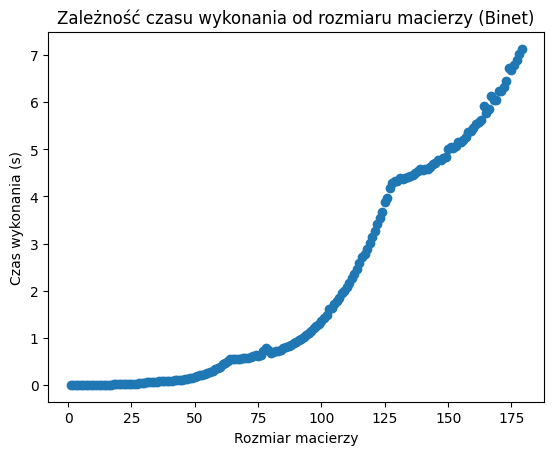

In [6]:
import matplotlib.pyplot as plt

plt.scatter(range(1, len(successful_binet_wrappers) + 1), [wrapper.time_used for wrapper in successful_binet_wrappers])
plt.title("Zależność czasu wykonania od rozmiaru macierzy (Binet)")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas wykonania (s)")
plt.show()

Na powyższym wykresie widać pewnego rodzaju "spowolnienie" wzrostu czasu wykonania dla niektórych rozmiarów macierzy. Spowodowane jest to faktem, że algorytm radzi sobie najlepiej z macierzami o wymiarach $2^n$ x $2^n$, ponieważ wtedy podziały na bloki można wykonywać do momentu, aż osiągną one rozmiar 1 × 1. W pozostałych przypadkach, gdy macierz ma rozmiar niebędący potęgą dwójki, podziały na bloki są nierówne, co skutkuje koniecznością pomnożenia przez siebie macierzy o wymiarach $1$ x $k$ lub $k$ x $1$.

#### Liczba operacji zmiennoprzecinkowych

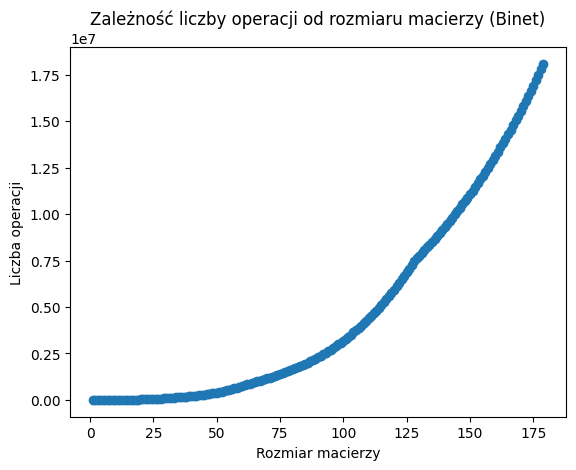

In [7]:
plt.scatter(range(1, len(successful_binet_wrappers) + 1), [wrapper.flops for wrapper in successful_binet_wrappers])
plt.title("Zależność liczby operacji od rozmiaru macierzy (Binet)")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Liczba operacji")
plt.show()

#### Zużycie pamięci

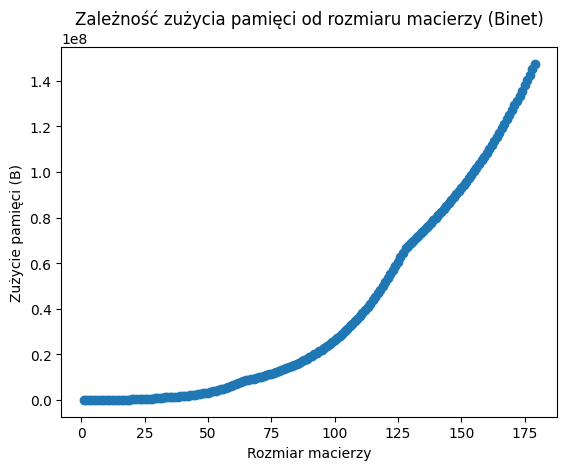

In [8]:
plt.scatter(range(1, len(successful_binet_wrappers) + 1), [wrapper.memory_used for wrapper in successful_binet_wrappers])
plt.title("Zależność zużycia pamięci od rozmiaru macierzy (Binet)")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Zużycie pamięci (B)")
plt.show()

#### Złożoność obliczeniowa

Dopasowujemy krzywą postaci $$ y = a * x^b $$

In [9]:
def func(x, a, b):
    return a * x ** b

In [10]:
from scipy.optimize import curve_fit

params, _ = list(curve_fit(func, range(1, len(successful_binet_wrappers) + 1), [wrapper.time_used for wrapper in successful_binet_wrappers]))

Oszacowana wartość parametrów wyniosła:

In [11]:
print(f"a = {params[0]}", f"b = {params[1]}", sep="\n")

a = 2.568488108382466e-05
b = 2.423513092197432


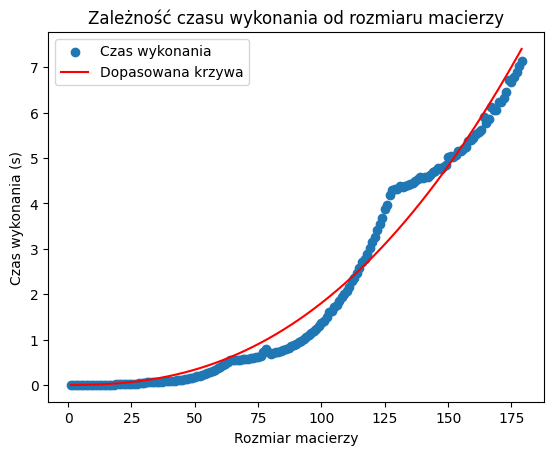

In [12]:
plt.scatter(range(1, len(successful_binet_wrappers) + 1), [wrapper.time_used for wrapper in successful_binet_wrappers])
plt.plot(range(1, len(successful_binet_wrappers) + 1), [params[0] * i ** params[1] for i in range(1, len(successful_binet_wrappers) + 1)], color="red")
plt.title("Zależność czasu wykonania od rozmiaru macierzy")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas wykonania (s)")
plt.legend(["Czas wykonania", "Dopasowana krzywa"])
plt.show()

Obliczony współczynnik *b* we wzorze funkcji sugeruje, że mamy do czynienia ze złożonością podobną do teoretycznej, wynoszącej $O(n^3)$.

## Algorytm Strassena
Istotą algorytmu Strassena jest zmniejszenie liczby mnożeń macierzy przez zastąpienie części z nich operacjami dodawania i odejmowania, które są mniej kosztowne obliczeniowo. Algorytm działa rekurencyjnie, dzieląc macierze na podmacierze i wykonując na nich określone operacje.

### Pseudokod algorytmu
1. Jeśli macierz nie jest kwadratowa, to uzupełnij ją zerami to najmniejszego możliwego rozmiaru kwadratowego.
mieszczącego macierz: qxq, gdzie q to max(m, n, p), a m, n, p to odpowiednio wymiary macierzy A i wysokość macierzy B
2. W rekurencji aż rozmiar macierzy nie będzie mniejszy lub równy 4 × 4, powtarzaj poniższe kroki.
(Jeśli jakaś macierz ma rozmiar 4 × 4 lub mniejszy to wykonaj klasyczne mnożenie macierzowe)
3. Podziel macierze A i B na osiem równych podmacierzy A11, A12, A21, A22 i B11, B12, B21, B22
 Oblicz następujące sumy
     - P1 = felxible_multiply(A11 + A22, B11 + B22)
     - P2 = felxible_multiply(A21 + A22, B11)
     - P3 = felxible_multiply(A11, B12 - B22)
     - P4 = felxible_multiply(A22, B21 - B11)
     - P5 = felxible_multiply(A11 + A12, B22)
     - P6 = felxible_multiply(A21 - A11, B11 + B12)
     - P7 = felxible_multiply(A12 - A22, B21 + B22)

   gdzie flexible_multiply dla macierzy kwadratowych większych niż 4 × 4 to rekurencyjne zejście z powrotem do podpunktu 3, a dla macierzy niekwadratowych lub kwadratowych mniejszych, lub równych 4 × 4, jest to zwykłe klasyczne mnożenie macierzowe.

 4. Zsumuj je do sum, dających wynikową macierz C:
     - C11 = P1 + P4 - P5 + P7
     - C12 = P3 + P5
     - C21 = P2 + P4
     - C22 = P1 - P2 + P3 + P6

 Zwróć macierz C jako wynik mnożenia macierzy A i B.


### Implementacja
```python
def pad_matrix(self, A, new_shape):
    """
    Funkcja do uzupełnia macierzy prostokątnej A do rozmiaru kwadratowego new_shape
    """
    m, n = A.shape
    m2, n2 = new_shape
    P = np.zeros((m2, n2), dtype=A.dtype)
    P[:m, :n] = A
    self.memory_used += P.nbytes
    return P

def pad_matrix_even(self, A):
    """
    Funkcja do uzupełniania macierzy kwadratowej A o nieparzystym rozmiarze zerami tak aby rozmaiar był parzysty (jednen wiersz i kolumna zer)
    """
    n = A.shape[0]
    if n % 2 == 0:
        return A
    P = np.zeros((n + 1, n + 1), dtype=A.dtype)
    P[:n, :n] = A
    self.memory_used += P.nbytes
    return P

def matmul(self, A, B):
    """
    Funkcja klasycznego mnożenia macierzy
    """
    assert A.shape[1] == B.shape[0], "Incorrect sizes"
    m, n, p = A.shape[0], A.shape[1], B.shape[1]
    C = np.zeros((m, p), dtype=A.dtype)
    self.memory_used += C.nbytes
    for i in range(m):
        for j in range(p):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]
                self.flops += 2
    return C

def _strassen_flexible(self, A, B):
    """
    Funkcja mnożenia dwóch macierzy kwadratowych metodą Strassena, dzięki odpowiedniemu paddingowi zerami (nie zachłannemu),
    Można używać jej dla każdych dwóch odpowiadających macierzy kwadratowych, a nie tylko do takich o rozmiarze 2^n, gdzie n to liczba naturalna.
    """
    n = A.shape[0]

    if n % 2 != 0:
        A = self.pad_matrix_even(A)
        B = self.pad_matrix_even(B)
        n += 1

    if n <= 4:
        return self.matmul(A, B)

    k = n // 2

    A11, A12, A21, A22 = A[:k, :k], A[:k, k:], A[k:, :k], A[k:, k:]
    B11, B12, B21, B22 = B[:k, :k], B[:k, k:], B[k:, :k], B[k:, k:]
    self.flops += 18 * (k ** 2)

    def felxible_multiply(X, Y):
        if X.shape == Y.shape and X.shape[0] == X.shape[1] and X.shape[0] > 4:
            return self.strassen(X, Y)
        else:
            return self.matmul(X, Y)

    P1 = felxible_multiply(A11 + A22, B11 + B22)
    P2 = felxible_multiply(A21 + A22, B11)
    P3 = felxible_multiply(A11, B12 - B22)
    P4 = felxible_multiply(A22, B21 - B11)
    P5 = felxible_multiply(A11 + A12, B22)
    P6 = felxible_multiply(A21 - A11, B11 + B12)
    P7 = felxible_multiply(A12 - A22, B21 + B22)

    C11 = P1 + P4 - P5 + P7
    C12 = P3 + P5
    C21 = P2 + P4
    C22 = P1 - P2 + P3 + P6

    self.flops += 8 * (k ** 2)

    C = np.vstack([
        np.hstack([C11, C12]),
        np.hstack([C21, C22])
    ])
    self.memory_used += C.nbytes
    return C[:n, :n]

def strassen(self, A, B):
    """
    Funkcja mnożenia macierzy metodą Strassena, zoptymalizowana dla macierzy dowolnych rozmiarów.
    Przyjmuje macierze A i B o dowolnym rozmiarze, zwraca macierz C będącą wynikiem mnożenia A i B
    """

    if A.ndim == 1:
        A = A.reshape(1, 1)
    if B.ndim == 1:
        B = B.reshape(1, 1)
    n, m = A.shape
    m2, p = B.shape
    assert m == m2, "Incorrect sizes"

    q = max(m, n, p)

    A_pad = self.pad_matrix(A, (q, q))
    B_pad = self.pad_matrix(B, (q, q))

    C_pad = self._strassen_flexible(A_pad, B_pad)

    C = C_pad[:n, :p].astype(A.dtype)

    self.memory_used += C.nbytes

    if C.shape[0] == 1 or C.shape[1] == 1:
        return C.reshape(-1)
    else:
        return C
```

### Analiza algorytmu

In [13]:
from strassen import StrassenWrapper

wrappers = [StrassenWrapper() for _ in range(len(matrices))]
for _ in range(4):
    for i, (matrix_a, matrix_b) in enumerate(matrices):
        time1 = perf_counter()
        wrappers[i].strassen(matrix_a, matrix_b)
        time2 = perf_counter()
        wrappers[i].time_used.append(time2 - time1)
        if wrappers[i].time_used[-1] > 7:
            break

for wrapper in wrappers:
    if not wrapper.time_used:
        break
    wrapper.flops //= len(wrapper.time_used)
    wrapper.memory_used //= len(wrapper.time_used)
    wrapper.time_used = median(wrapper.time_used)


successful_strassen_wrappers = [wrapper for wrapper in wrappers if wrapper.time_used != []]

#### Czas wykonania

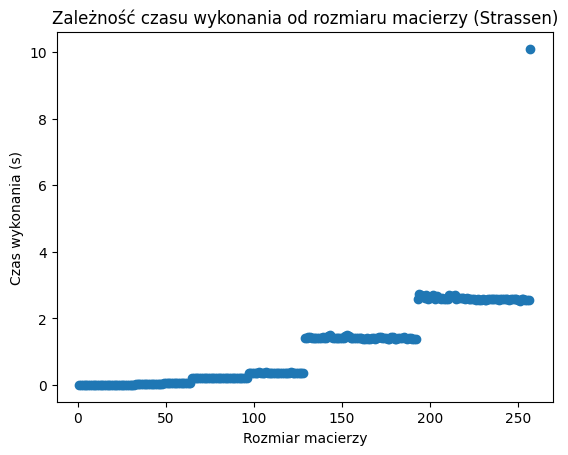

In [14]:
plt.scatter(range(1, len(successful_strassen_wrappers) + 1), [wrapper.time_used for wrapper in successful_strassen_wrappers])
plt.title("Zależność czasu wykonania od rozmiaru macierzy (Strassen)")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas wykonania (s)")
plt.show()

W kontekście czasu wykonania algorytmu Strassena dokonaliśmy 3 głównych obserwacji:
1. Złożoność algorytmu Strassena rośnie "schodkowo", a schodki występują dla rozmiarów będących kwadratami liczb parzystych (64, 100, 144, 196, ...). Wynika to z przyjętego przez nas paddingu, w którym uzupełniamy macierz do najbliższego, parzystego kwadratu.
2. Algorytm dał radę w założonym czasie 7 s na jedno mnożenie policzyć znacznie większe macierze niż algorytm Binéta.

#### Liczba operacji zmiennoprzecinkowych

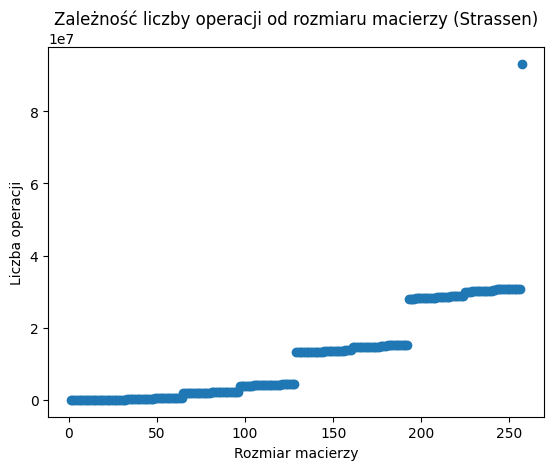

In [15]:
plt.scatter(range(1, len(successful_strassen_wrappers) + 1), [wrapper.flops for wrapper in successful_strassen_wrappers])
plt.title("Zależność liczby operacji od rozmiaru macierzy (Strassen)")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Liczba operacji")
plt.show()

#### Zużycie pamięci

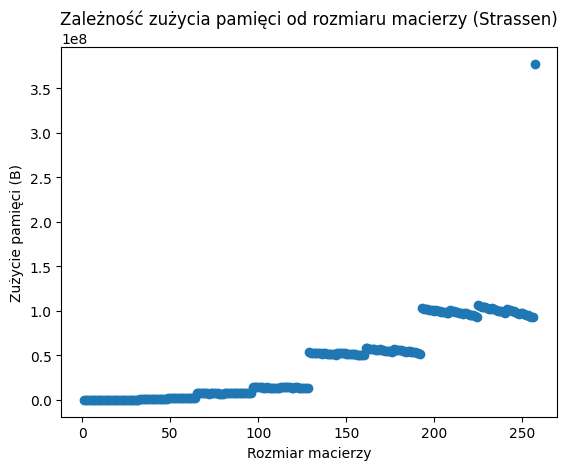

In [16]:
plt.scatter(range(1, len(successful_strassen_wrappers) + 1), [wrapper.memory_used for wrapper in successful_strassen_wrappers])
plt.title("Zależność zużycia pamięci od rozmiaru macierzy (Strassen)")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Zużycie pamięci (B)")
plt.show()

#### Złożoność obliczeniowa

Ponownie, dopasowujemy krzywą postaci $$ y = a * x^b $$

In [17]:
params, _ = curve_fit(func, range(1, len(successful_strassen_wrappers) + 1), [wrapper.time_used for wrapper in successful_strassen_wrappers])

Obliczone wartości parametrów wynoszą:

In [18]:
print(f"a = {params[0]}", f"b = {params[1]}", sep="\n")

a = 4.961308282816462e-05
b = 2.00662526476123


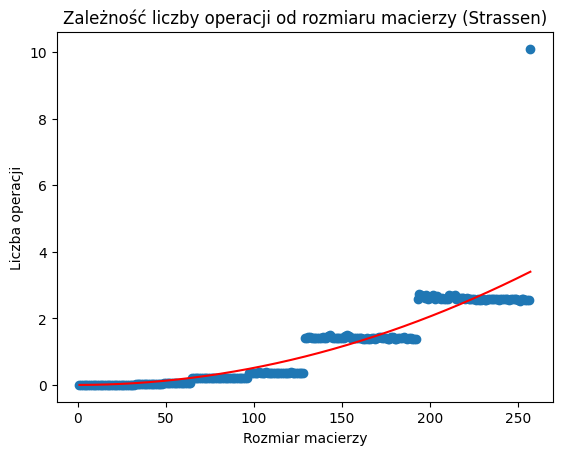

In [19]:
plt.scatter(range(1, len(successful_strassen_wrappers) + 1), [wrapper.time_used for wrapper in successful_strassen_wrappers])
plt.plot(range(1, len(successful_strassen_wrappers) + 1), [params[0] * i ** params[1] for i in range(1, len(successful_strassen_wrappers) + 1)], color="red")
plt.title("Zależność liczby operacji od rozmiaru macierzy (Strassen)")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Liczba operacji")
plt.show()

W tym przypadku, pewnie ze względu na "schodkowy" charakter liczby operacji, dopasowanie krzywej jest dość ciężkie. Można jednak zauważyć, że jej parametr *b* jest mniejszy niż w przypadku krzywej opisującej metodę Bineta, co potwierdza, że metoda Strassena ma mniejszą złożoność obliczeniową.

Złożoność teoretyczna wynosi $ O(n^{\log_2 7}) \approx O(n^{2.81}) $, zatem algorytm ten jest lepszy od standardowego $ O(n^3) $.

## Mnożenie metodą AI
Ostatni prezentowany przez nas algorytm to mnożenie macierzy metodą opracowną przy użyciu systemu sztucznej inteligencji AlphaTensor. W wersji przedstawionej w [artykule](https://deepmind.google/discover/blog/discovering-novel-algorithms-with-alphatensor/#:~:text=In%20our%20paper,%20published%20today%20in%20Nature,%20we) algorytm ten mnoży macierze o wymiarach $ 4^n $ x $ 5^n $ z macierzami $ 5^n $ x $ 5^n$. Przeprowadziliśmy zatem testy dla wartości $ n \in \{1, 2, 3, 4\} $.

### Pseudokod algorytmu
1. Dzielić macierze A i B na odpowiednio 4 × 5, 5 × 5 bloków
2. Schodzić rekurencyjne w mnożeniu dla odpowiednich bloków, aż nie osiągną rozmiarów 4 × 5 i 5 × 5.
3. Dla macierzy 4 × 5 (A), 5 × 5 (B) obliczyć H1-H76 będące odpowiednimi iloczynami sum wartości z A i B,
 zgodnie ze wzorami na macierz wynikową C, zsumować odpowiednie iloczyny H
4. Zwrócić macierz C

Konkretne wzory na H1-H76 dostępne są w [artykule](https://deepmind.google/discover/blog/discovering-novel-algorithms-with-alphatensor/#:~:text=In%20our%20paper,%20published%20today%20in%20Nature,%20we).

### Implementacja
```python
def ai_matrix_multiply_strict(self, A, B):
    """
    Funkcja mnożenia macierzy o rozmiarach 4x5, 5x5,
    korzystająca ze sposobu opisanego w artykule AI killing Strassen, w czasopiśmie Nature.
    """
    assert A.shape==(4,5) and B.shape==(5,5), "Incorrect sizes for this multiplication method, should be 4x5 and 5x5"
    H1  = A[2,1] * (-B[1,0] - B[1,4] - B[2,0])
    H2  = (A[1,1] + A[1,4] - A[2,4]) * (-B[1,4] - B[4,0])
    H3  = (-A[2,0] - A[3,0] + A[3,1]) * (-B[0,0] + B[1,4])
    ... # Pozostałe wzory dostępne w artykule

    C = np.zeros((4,5))
    C[0,0] = int(-H10 + H12 + H14 - H15 - H16 + H53 + H5 - H66 - H7)
    C[1,0] = int(H10 + H11 - H12 + H13 + H15 + H16 - H17 - H44 + H51)
    C[2,0] = int(H10 - H12 + H15 + H16 - H1 + H2 + H3 - H4 + H75)
    ... # Pozostałe wzory dostępne w artykule
    return C

def _ai_matrix_multiply(self, A, B):
    """
    Rozszerzenie funkcji ai_matrix_multiply_strict,
    wykorzytsujące ją do mnożenia między sobą dwóch macierzy
    o rozmiarach będących potęgami rozmiarów 4x5, 5x5.
    """
    assert (
        A.shape[1] == 5 ** round(log(A.shape[1], 5)) and
        A.shape[0] == 4 ** round(log(A.shape[0], 4)) and
        B.shape[0] == 5 ** round(log(B.shape[0], 5)) and
        B.shape[1] == 5 ** round(log(B.shape[1], 5)) and
        A.shape[1] == B.shape[0]
    ), "Incorrect matrix sizes, must be 4x5, 5x5, or their powers"

    def ai_matrix_multiply_rec(A, B):
        if A.shape==(4,5) and B.shape==(5,5):
            return self.ai_matrix_multiply_strict(A, B)
        else:
            n, m = A.shape
            k4 = n // 4
            k5 = m // 5
            A_blocks = [[A[i*k4:(i+1)*k4, j*k5:(j+1)*k5] for j in range(5)] for i in range(4)]
            B_blocks = [[B[i*k5:(i+1)*k5, j*k5:(j+1)*k5] for j in range(5)] for i in range(5)]
            C_blocks = [[np.zeros((4,5)) for _ in range(5)] for _ in range(4)]
            for i in range(4):
                for j in range(5):
                    for k in range(5):
                        C_blocks[i][j] = ai_matrix_multiply_rec(A_blocks[i][k], B_blocks[k][j])
            C = np.block(C_blocks)
            return C

    return ai_matrix_multiply_rec(A, B)

def ai_matrix_multiply(self, A, B):
    """
    Opakowanie funkcji _ai_matrix_multiply,
    liczące czas trwaniam flops, oraz zużytą pamięć.
    """
    start_time = time.time()
    self.memory_used += A.nbytes + B.nbytes
    self.flops += 76 * 10 + 4 * 5 * 9
    C = self._ai_matrix_multiply(A, B)
    self.memory_used += C.nbytes
    end_time = time.time()
    return C
```

### Analiza algorytmu

W tej analizie, mówiąc o rozmiarze macierzy, będziemy mieć na myśli liczbę wieszy (i kolumn) w macierzy $ 5^n $ x $ 5^n $.

In [20]:
from ai import AIWrapper

ai_wrappers = [AIWrapper() for _ in range(4)]
for i in range(4):
    for size in range(1, 5):
        matrix_a = np.random.uniform(0.00000001, 1, (4 ** size, 5 ** size))
        matrix_b = np.random.uniform(0.00000001, 1, (5 ** size, 5 ** size))
        time1 = perf_counter()
        ai_wrappers[size - 1].ai_matrix_multiply(matrix_a, matrix_b)
        time2 = perf_counter()
        ai_wrappers[size - 1].time_used.append(time2 - time1)
        
for wrapper in ai_wrappers:
    wrapper.memory_used //= len(wrapper.time_used)
    wrapper.flops //= len(wrapper.time_used)
    wrapper.time_used = median(wrapper.time_used)

#### Czas wykonania

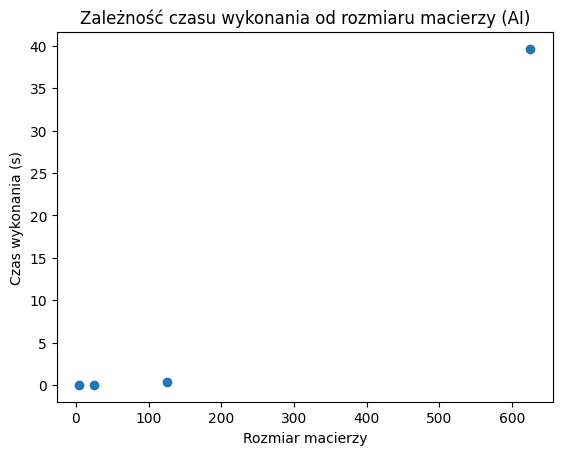

In [21]:
plt.scatter([5 ** i for i in range(1, 5)], [wrapper.time_used for wrapper in ai_wrappers])
plt.title("Zależność czasu wykonania od rozmiaru macierzy (AI)")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas wykonania (s)")
plt.show()

#### Liczba operacji zmiennoprzecinkowych

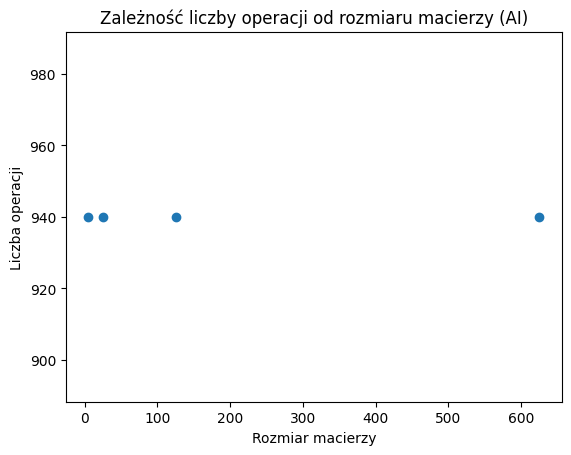

In [22]:
plt.scatter([5 ** i for i in range(1, 5)], [wrapper.flops for wrapper in ai_wrappers])
plt.title("Zależność liczby operacji od rozmiaru macierzy (AI)")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Liczba operacji")
plt.show()

#### Zużycie pamięci

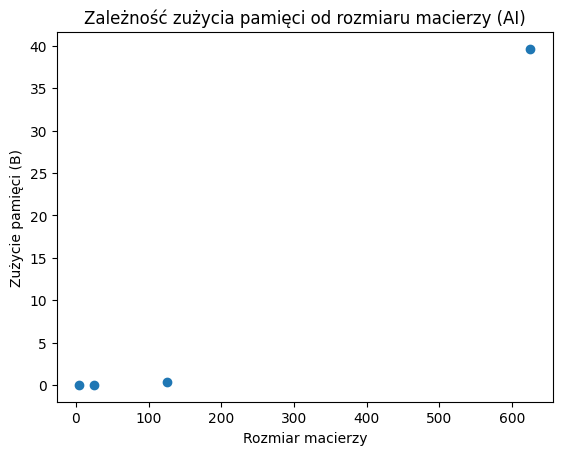

In [23]:
plt.scatter([5 ** i for i in range(1, 5)], [wrapper.time_used for wrapper in ai_wrappers])
plt.title("Zależność zużycia pamięci od rozmiaru macierzy (AI)")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Zużycie pamięci (B)")
plt.show()

#### Złożoność obliczeniowa

In [24]:
params, _ = curve_fit(func, [5 ** i for i in range(1, 5)], [wrapper.time_used for wrapper in ai_wrappers])

Obliczona wartość parametów wyniosła:

In [25]:
print(f"a={params[0]}", f"b={params[1]}", sep="\n")

a=3.882733282512697e-07
b=2.86454100964339


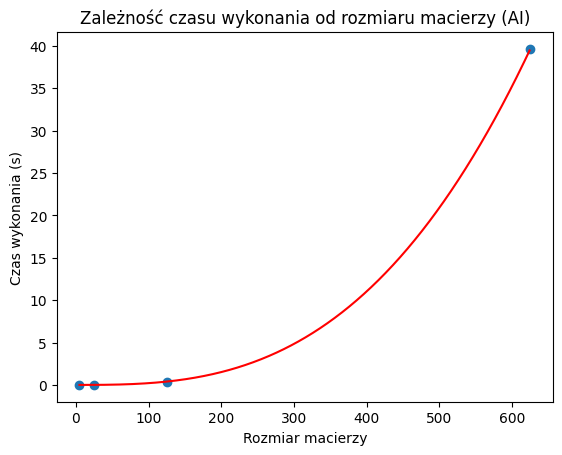

In [26]:
plt.scatter([5 ** i for i in range(1, 5)], [wrapper.time_used for wrapper in ai_wrappers])
plt.plot(range(5, 5 ** 4), [params[0] * i ** params[1] for i in range(5, 5 ** 4)], color="red")
plt.title("Zależność czasu wykonania od rozmiaru macierzy (AI)")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas wykonania (s)")
plt.show()

Uzyskana tutaj złożoność wydaje się mieć sens - jest pomiędzy $ O(n^3) $ a $ O(n^2) $, czyli algorytm ten jest lepszy od standardowego.

## Podusmowanie
Wykonanie zadania pozwoliło nam lepiej zapoznać się z algorytmami mnożenia macierzy i porównać je ze sobą. Przekonaliśmy się, że algorytmy tworzone przez modele AI mogą przewyższać możliwości algorytmów tworzonych przez ludzi. Ćwiczenia było dobrym wprowadzeniem do problematyki mnożenia macierzy, które jest wykorzsytywane także w innych algorytmach, takich jak np. szukanie odwrotności macierzy.

Jednocześnie natrafiliśmy na pewne trudności, przede wszystkim z oszacowaniem złożoności obliczeniowej algorytmów na podstawie zależności rozmiaru macierzy od czasu wykonania. Ta metoda okazała się niewystarczająca dla "nietypowego" wykresu, otrzymanego przy analizie algorytmu Strassena.

Porównanie algorytmów, przeprowadzone dla macierzy o rozmiarach od 1 x 1 do 150 x 150, prezentujemy poniżej.

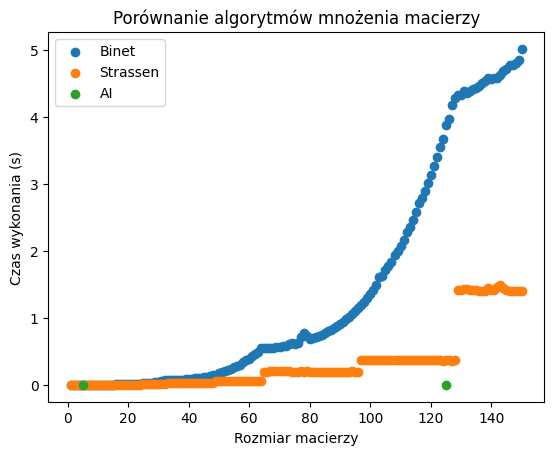

In [28]:
plt.scatter(range(1, 151), [wrapper.time_used for wrapper in successful_binet_wrappers[:150]])
plt.scatter(range(1, 151), [wrapper.time_used for wrapper in successful_strassen_wrappers[:150]])
plt.scatter([5, 125], [wrapper.time_used for wrapper in ai_wrappers[:2]])
plt.title("Porównanie algorytmów mnożenia macierzy")
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas wykonania (s)")
plt.legend(["Binet", "Strassen", "AI"])
plt.show()